Import library

In [ ]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import classification_report,accuracy_score


Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

Preprocessing

In [ ]:
train_dir = "/content/drive/MyDrive/datasetCapstone/dataset/klasifikasi2/train"
test_dir = "/content/drive/MyDrive/datasetCapstone/dataset/klasifikasi2/test"

# Data generator untuk training
train_datagen = ImageDataGenerator(rescale =1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest",
                                   validation_split=0.2)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(128,128),
                                                  color_mode="rgb",
                                                  class_mode="categorical",
                                                  subset="training")
# Data generator untuk validation
valid_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(128,128),
                                                    color_mode="rgb",
                                                    class_mode="categorical",
                                                    subset="validation")

# Data generator untuk test
test_datagen = ImageDataGenerator(rescale =1./255)
test_generator = train_datagen.flow_from_directory(test_dir,
                                                   target_size=(128,128),
                                                   color_mode="rgb",
                                                   class_mode="categorical")

Found 5017 images belonging to 10 classes.
Found 1252 images belonging to 10 classes.
Found 71 images belonging to 2 classes.


Build Model

In [ ]:
# Load the MobileNetV2 model pre-trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model
base_model.trainable = False

# Create the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(128, activation="relu"),
    Dense(10, activation='softmax')
])

model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                           

Compile the model

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Train the model

In [ ]:
history = model.fit(train_generator, validation_data=valid_generator, epochs=50, verbose=1)

Epoch 1/50
157/157 [==============================] - 2020s 13s/step - loss: 0.9892 - accuracy: 0.6627 - val_loss: 0.8537 - val_accuracy: 0.7236
Epoch 2/50
157/157 [==============================] - 74s 471ms/step - loss: 0.5141 - accuracy: 0.8146 - val_loss: 0.9386 - val_accuracy: 0.6797
Epoch 3/50
157/157 [==============================] - 67s 429ms/step - loss: 0.4617 - accuracy: 0.8393 - val_loss: 0.7808 - val_accuracy: 0.7236
Epoch 4/50
157/157 [==============================] - 68s 436ms/step - loss: 0.3992 - accuracy: 0.8627 - val_loss: 0.6773 - val_accuracy: 0.7748
Epoch 5/50
157/157 [==============================] - 67s 430ms/step - loss: 0.3755 - accuracy: 0.8712 - val_loss: 0.6008 - val_accuracy: 0.8043
Epoch 6/50
157/157 [==============================] - 74s 472ms/step - loss: 0.3398 - accuracy: 0.8814 - val_loss: 0.7017 - val_accuracy: 0.7636
Epoch 7/50
157/157 [==============================] - 69s 442ms/step - loss: 0.3431 - accuracy: 0.8814 - val_loss: 0.6566 - val_ac

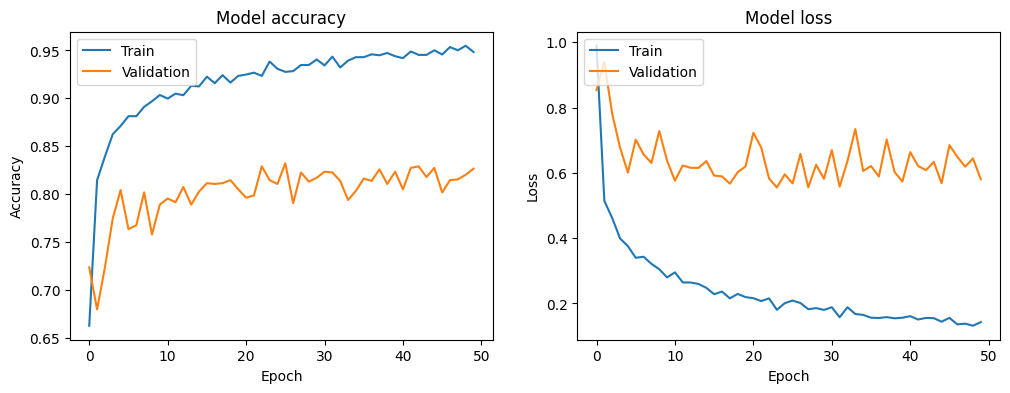

In [ ]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Save the model to an HDF5 file
model.save('/content/drive/MyDrive/datasetCapstone/saved_model/my_model_klasifikasi_128.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/datasetCapstone/saved_model/my_model_klasifikasi_128.h5')


In [ ]:
def load_and_preprocess_image(img_path, target_size=(128, 128)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array


In [ ]:
def display_image(img_path):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [ ]:
def predict_image(model, img_path, class_labels):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions) * 100  # Convert to percentage
    return class_labels[predicted_class], confidence


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

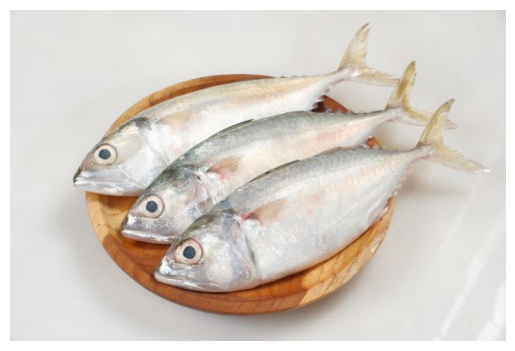

1/1 [==============================] - 0s 21ms/step
Predicted Class: bawal putih, Confidence: 81.85%


In [ ]:
img_path = '/content/drive/MyDrive/datasetCapstone/test123/test7.jpg'

# Define the class labels based on your dataset
class_labels = ['bawal putih', 'belato', 'cakalang', 'gembolo', 'gole gole', 'kakap merah', 'kembung', 'kerapu', 'tenggiri', 'tongkol']

# Display the image
display_image(img_path)

# Predict the image
predicted_class, confidence = predict_image(model, img_path, class_labels)
print(f'Predicted Class: {predicted_class}, Confidence: {confidence:.2f}%')


Evaluasi model